### Title: Unveiling Malaysia's Job Market: Jobstreet Posting Trends (2023-2024)

Description: Explore Malaysia's job market with insights from JobStreet's latest posting trends. This overview highlights hiring patterns, popular industries, and top skills employers are looking for. Learn about the areas with the most job opportunities and understand how the job market is changing. Whether you're a job seeker, employer, or just curious, this guide will help you stay updated on Malaysia's growing workforce.

### What is Jobstreet?
JobStreet is a popular online job portal that connects job seekers with employers across various industries. Founded in Malaysia, it operates in several countries in the Asia-Pacific region, including Singapore, the Philippines, Indonesia, and Vietnam.


### Why Do People Seek Jobs?
People seek jobs for various reasons, including:

1.Income and Financial Stability:

A primary reason for working is to earn money to cover living expenses, such as food, housing, education, and healthcare.

2.Personal Fulfillment:

Many people pursue jobs to achieve their personal goals, follow their passions, or contribute to something meaningful.

3.Career Growth and Development:

Jobs provide opportunities to learn new skills, gain experience, and advance in a chosen career path.

4.Meeting Basic and Psychological Needs:

Beyond financial needs, jobs fulfill psychological needs for achievement, self-worth, and independence.

**Feature**
- Salary
- State
- Category
- Listing date
- Employment type


**Problem Statement**

The job market in Malaysia is shifting, making it harder for job seekers to find the right opportunities and for employers to find qualified candidates due to skill mismatches. Policymakers also need clear data to improve job training and education programs.

This project aims to analyze job posting trends on JobStreet in Malaysia to address the following questions:

- What are the most in-demand roles and skills across industries?
- How do job postings vary by location and job type (e.g., full-time, part-time, remote)?
- Are there seasonal trends or other temporal patterns in job postings?
- How do salaries differ across roles and industries?

By uncovering these trends, this project seeks to provide actionable insights for job seekers, career counselors, educational institutions, and employers to align their strategies with the evolving job market dynamics.


### Import Libraries and Data

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "jobstreet_all_job_dataset.csv"
df = pd.read_csv(file_path)

df

,job_id,job_title,company,descriptions,location,category,subcategory,role,type,salary,listingDate
0,74630583,Procurement Executive (Contract),Coca-Cola Bottlers (Malaysia) Sdn Bhd,Position Purpose\nManage aspects of procuremen...,Negeri Sembilan,"Manufacturing, Transport & Logistics","Purchasing, Procurement & Inventory",procurement-executive,Contract/Temp,NaN,2024-03-21T05:58:35Z
1,74660602,Account Executive/ Assistant,Acoustic & Lighting System Sdn Bhd,We are looking for a Account Executive/ Assist...,Petaling,Accounting,Bookkeeping & Small Practice Accounting,executive-assistant,Full time,"RM 2,800 – RM 3,200 per month",2024-03-22T06:52:57Z
2,74655679,"Data Analyst - Asset Management, SPX Express",Shopee Mobile Malaysia Sdn Bhd,Performs detailed data analysis on existing sp...,Klang District,"Manufacturing, Transport & Logistics",Analysis & Reporting,asset-management-analyst,Full time,NaN,2024-03-22T04:22:43Z
3,74657624,Service Engineer,Sun Medical Systems Sdn Bhd,"You are important for troubleshooting, install...",Petaling,Engineering,Electrical/Electronic Engineering,services-engineer,Full time,"RM 3,000 – RM 3,500 per month",2024-03-22T05:32:09Z
4,74679363,Purchasing Executive,Magnet Security & Automation Sdn. Bhd.,"MAG is a trailblazer in the industry, boasting...",Hulu Langat,"Manufacturing, Transport & Logistics","Purchasing, Procurement & Inventory",purchasing-executive,Full time,"RM 2,800 – RM 3,500 per month",2024-03-23T03:56:39Z
...,...,...,...,...,...,...,...,...,...,...,...
59301,76653277,"Marketing Specialist, APAC",Glory Global Solutions (M),MAIN RESPONSIBILITIES\nSupport the Asia Pacifi...,Kuala Lumpur,Marketing & Communications,Marketing Communications,marketing-specialist,Full time,"RM 4,000 – RM 6,000 per month",2024-06-18T06:45:54Z
59302,76674488,Talent Acquisition Partner,PERSOLKELLY Workforce Solutions Malaysia Sdn Bhd,Job Descriptions:\nPartner closely with HRBPs ...,Kuala Lumpur,Human Resources & Recruitment,Recruitment - Internal,talent-acquisition-partner,Contract/Temp,"RM 4,000 – RM 5,000 per month",2024-06-19T03:37:54Z
59303,76658887,Motor Insurance Executive,MRMC Consultants Sdn Bhd,Objective:\nHighly motivated and customer-focu...,Kuala Lumpur,Insurance & Superannuation,Brokerage,Motor-Insurance-Executive,Full time,"RM 2,500 – RM 3,500 per month",2024-06-18T10:15:07Z
59304,76653289,Banca Specialist (Klang Valley),AmBank Group,Job Descriptions:\nDelivers sales target for b...,Kuala Lumpur,Banking & Financial Services,Banking - Retail/Branch,specialist,Full time,NaN,2024-06-18T06:46:18Z


In [104]:
df_population = pd.read_csv('population_state.csv')

df_population


,state,date,sex,age,ethnicity,population
0,Johor,1970-01-01,both,overall,overall,1325.6
1,Johor,1970-01-01,both,0-4,overall,210.1
2,Johor,1970-01-01,both,5-9,overall,215.7
3,Johor,1970-01-01,both,10-14,overall,192.2
4,Johor,1970-01-01,both,15-19,overall,152.8
...,...,...,...,...,...,...
257290,W.P. Putrajaya,2024-01-01,male,85+,bumi_other,0.0
257291,W.P. Putrajaya,2024-01-01,male,85+,chinese,0.0
257292,W.P. Putrajaya,2024-01-01,male,85+,indian,0.0
257293,W.P. Putrajaya,2024-01-01,male,85+,other_citizen,0.0


### Data Cleaning

In [105]:
df_population["year"] = pd.to_datetime(df_population["date"], errors='coerce').dt.year
start_year = 2024

filtered_df_population = df_population[
    (df_population["year"] == start_year) &
    (df_population["sex"] == "both") &
    (df_population["age"] == "overall") &
    (df_population["ethnicity"] == "overall")
]

filtered_df_population = filtered_df_population.groupby(['state', 'year'], as_index=False).agg({'population': 'sum'})

filtered_df_population['population'] = filtered_df_population['population'] / 1000

total_population = filtered_df_population['population'].sum()
sum_row = pd.DataFrame([{'state': 'Total', 'year': start_year, 'population': total_population}])

filtered_df_population = pd.concat([filtered_df_population, sum_row], ignore_index=True)

filtered_df_population


,state,year,population
0,Johor,2024,4.1863
1,Kedah,2024,2.2175
2,Kelantan,2024,1.8885
3,Melaka,2024,1.0471
4,Negeri Sembilan,2024,1.2401
5,Pahang,2024,1.6682
6,Perak,2024,2.5696
7,Perlis,2024,0.2968
8,Pulau Pinang,2024,1.8004
9,Sabah,2024,3.7422


In [106]:
total_population_per_state = filtered_df_population.groupby('state')['population'].sum().reset_index()

total_population_per_state = total_population_per_state[total_population_per_state['state'] != 'Total']

total_population_per_state.to_csv("final_population_dataset.csv", index=False)

In [107]:
missing_values = df.isnull().sum()
missing_values

job_id              0
job_title           0
company             0
descriptions        0
location            0
category            0
subcategory         0
role             1936
type                0
salary          32665
listingDate         0
dtype: int64

In [108]:
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df

,job_id,job_title,company,descriptions,location,category,subcategory,role,type,salary,listingDate
0,74660602,Account Executive/ Assistant,Acoustic & Lighting System Sdn Bhd,We are looking for a Account Executive/ Assist...,Petaling,Accounting,Bookkeeping & Small Practice Accounting,executive-assistant,Full time,"RM 2,800 – RM 3,200 per month",2024-03-22T06:52:57Z
1,74657624,Service Engineer,Sun Medical Systems Sdn Bhd,"You are important for troubleshooting, install...",Petaling,Engineering,Electrical/Electronic Engineering,services-engineer,Full time,"RM 3,000 – RM 3,500 per month",2024-03-22T05:32:09Z
2,74679363,Purchasing Executive,Magnet Security & Automation Sdn. Bhd.,"MAG is a trailblazer in the industry, boasting...",Hulu Langat,"Manufacturing, Transport & Logistics","Purchasing, Procurement & Inventory",purchasing-executive,Full time,"RM 2,800 – RM 3,500 per month",2024-03-23T03:56:39Z
3,74677110,Accounts Executive,GENETEC TECHNOLOGY BERHAD,To assist in overall acounting functions for t...,Kajang/Bangi/Serdang,Accounting,Financial Accounting & Reporting,accounts-executive,Full time,"RM 3,000 – RM 4,500 per month",2024-03-23T00:22:28Z
4,74602737,Admin Assistant,Lein Hing Holdings Sdn Bhd,RESPONSIBILITIES:\nManager paperwork for Claim...,Kuala Lumpur,Administration & Office Support,Administrative Assistants,administration-officer,Full time,"RM 2,000 – RM 3,000 per month",2024-03-20T09:14:23Z
...,...,...,...,...,...,...,...,...,...,...,...
25988,76567802,"Marketing Executive, Cruises",TRAVELC INTERNATIONAL SDN. BHD.,We are seeking a highly motivated and proactiv...,Petaling,Marketing & Communications,Marketing Communications,marketing-executive,Full time,"RM 4,000 – RM 4,500 per month",2024-06-18T06:43:44Z
25989,76659690,Hotel Manager,Pinnacle Suites Management Sdn Bhd,Operational Management:\nOversee all aspects o...,Seremban District,Hospitality & Tourism,Management,hotel-manager,Full time,"RM 4,500 – RM 5,000 per month",2024-06-18T10:28:12Z
25990,76653277,"Marketing Specialist, APAC",Glory Global Solutions (M),MAIN RESPONSIBILITIES\nSupport the Asia Pacifi...,Kuala Lumpur,Marketing & Communications,Marketing Communications,marketing-specialist,Full time,"RM 4,000 – RM 6,000 per month",2024-06-18T06:45:54Z
25991,76674488,Talent Acquisition Partner,PERSOLKELLY Workforce Solutions Malaysia Sdn Bhd,Job Descriptions:\nPartner closely with HRBPs ...,Kuala Lumpur,Human Resources & Recruitment,Recruitment - Internal,talent-acquisition-partner,Contract/Temp,"RM 4,000 – RM 5,000 per month",2024-06-19T03:37:54Z


In [109]:
duplicates = df.duplicated()
df.reset_index(drop=True, inplace=True)
df

,job_id,job_title,company,descriptions,location,category,subcategory,role,type,salary,listingDate
0,74660602,Account Executive/ Assistant,Acoustic & Lighting System Sdn Bhd,We are looking for a Account Executive/ Assist...,Petaling,Accounting,Bookkeeping & Small Practice Accounting,executive-assistant,Full time,"RM 2,800 – RM 3,200 per month",2024-03-22T06:52:57Z
1,74657624,Service Engineer,Sun Medical Systems Sdn Bhd,"You are important for troubleshooting, install...",Petaling,Engineering,Electrical/Electronic Engineering,services-engineer,Full time,"RM 3,000 – RM 3,500 per month",2024-03-22T05:32:09Z
2,74679363,Purchasing Executive,Magnet Security & Automation Sdn. Bhd.,"MAG is a trailblazer in the industry, boasting...",Hulu Langat,"Manufacturing, Transport & Logistics","Purchasing, Procurement & Inventory",purchasing-executive,Full time,"RM 2,800 – RM 3,500 per month",2024-03-23T03:56:39Z
3,74677110,Accounts Executive,GENETEC TECHNOLOGY BERHAD,To assist in overall acounting functions for t...,Kajang/Bangi/Serdang,Accounting,Financial Accounting & Reporting,accounts-executive,Full time,"RM 3,000 – RM 4,500 per month",2024-03-23T00:22:28Z
4,74602737,Admin Assistant,Lein Hing Holdings Sdn Bhd,RESPONSIBILITIES:\nManager paperwork for Claim...,Kuala Lumpur,Administration & Office Support,Administrative Assistants,administration-officer,Full time,"RM 2,000 – RM 3,000 per month",2024-03-20T09:14:23Z
...,...,...,...,...,...,...,...,...,...,...,...
25988,76567802,"Marketing Executive, Cruises",TRAVELC INTERNATIONAL SDN. BHD.,We are seeking a highly motivated and proactiv...,Petaling,Marketing & Communications,Marketing Communications,marketing-executive,Full time,"RM 4,000 – RM 4,500 per month",2024-06-18T06:43:44Z
25989,76659690,Hotel Manager,Pinnacle Suites Management Sdn Bhd,Operational Management:\nOversee all aspects o...,Seremban District,Hospitality & Tourism,Management,hotel-manager,Full time,"RM 4,500 – RM 5,000 per month",2024-06-18T10:28:12Z
25990,76653277,"Marketing Specialist, APAC",Glory Global Solutions (M),MAIN RESPONSIBILITIES\nSupport the Asia Pacifi...,Kuala Lumpur,Marketing & Communications,Marketing Communications,marketing-specialist,Full time,"RM 4,000 – RM 6,000 per month",2024-06-18T06:45:54Z
25991,76674488,Talent Acquisition Partner,PERSOLKELLY Workforce Solutions Malaysia Sdn Bhd,Job Descriptions:\nPartner closely with HRBPs ...,Kuala Lumpur,Human Resources & Recruitment,Recruitment - Internal,talent-acquisition-partner,Contract/Temp,"RM 4,000 – RM 5,000 per month",2024-06-19T03:37:54Z


In [110]:
df = df.drop(['job_id', 'job_title', 'company', 'descriptions', 'subcategory', 'role'], axis=1)
df

,location,category,type,salary,listingDate
0,Petaling,Accounting,Full time,"RM 2,800 – RM 3,200 per month",2024-03-22T06:52:57Z
1,Petaling,Engineering,Full time,"RM 3,000 – RM 3,500 per month",2024-03-22T05:32:09Z
2,Hulu Langat,"Manufacturing, Transport & Logistics",Full time,"RM 2,800 – RM 3,500 per month",2024-03-23T03:56:39Z
3,Kajang/Bangi/Serdang,Accounting,Full time,"RM 3,000 – RM 4,500 per month",2024-03-23T00:22:28Z
4,Kuala Lumpur,Administration & Office Support,Full time,"RM 2,000 – RM 3,000 per month",2024-03-20T09:14:23Z
...,...,...,...,...,...
25988,Petaling,Marketing & Communications,Full time,"RM 4,000 – RM 4,500 per month",2024-06-18T06:43:44Z
25989,Seremban District,Hospitality & Tourism,Full time,"RM 4,500 – RM 5,000 per month",2024-06-18T10:28:12Z
25990,Kuala Lumpur,Marketing & Communications,Full time,"RM 4,000 – RM 6,000 per month",2024-06-18T06:45:54Z
25991,Kuala Lumpur,Human Resources & Recruitment,Contract/Temp,"RM 4,000 – RM 5,000 per month",2024-06-19T03:37:54Z


In [111]:
unique = df["location"].unique()
unique

array(['Petaling', 'Hulu Langat', 'Kajang/Bangi/Serdang', 'Kuala Lumpur',
       'Bangsar South', 'Kuala Selangor District', 'Bukit Jalil',
       'Penang Island', 'Sarawak', 'Selangor', 'Shah Alam/Subang',
       'Sipitang District', 'KL Eco City', 'Seberang Perai',
       'Gombak District', 'Johor Bahru District', 'Kuala Langat',
       'Seremban District', 'Kepong', 'Klang District', 'Kinta District',
       'Johor', 'Melaka', 'Penang', 'Cheras', 'Kuala Muda', 'Labuan',
       'Kulai District', 'Pahang', 'Taman Desa', 'Bangsar', 'Setapak',
       'Sepang', 'Kota Kinabalu District', 'Port Dickson District',
       'Kuala Lumpur Sentral', 'Kampar District', 'Perak',
       'Kulim District', 'Kuala Kangsar District', 'Bukit Damansara',
       'Kuchai Lama', 'Sibu Division', 'Pontian', 'Melaka Tengah',
       'Sabah', 'Kuching Division', 'Sri Petaling',
       'Kuala Lumpur City Centre', 'Hulu Selangor', 'Klang/Port Klang',
       'Muar District', 'Kepong Baru', 'Kuantan District', 'Amp

In [112]:
location_mapping_df = pd.read_csv('location_to_state.csv')

location_to_state = location_mapping_df.set_index('location')['state'].to_dict()

df['location_cleaned'] = df['location'].str.lower()

df['state'] = df['location_cleaned'].map(location_to_state)
df[['location', 'state']]

,location,state
0,Petaling,Selangor
1,Petaling,Selangor
2,Hulu Langat,Selangor
3,Kajang/Bangi/Serdang,Selangor
4,Kuala Lumpur,Kuala Lumpur
...,...,...
25988,Petaling,Selangor
25989,Seremban District,Negeri Sembilan
25990,Kuala Lumpur,Kuala Lumpur
25991,Kuala Lumpur,Kuala Lumpur


In [113]:
import re

def process_salary(salary):
    if pd.isna(salary):
        return None

    salary = str(salary).replace(',', '').replace('\xa0', ' ').strip()

    exchange_rate_sgd_to_myr = 3.4
    exchange_rate_usd_to_myr = 4.5

    currency = None

    if 'SGD' in salary:
        salary = re.sub(r'SGD', '', salary).strip()
        currency = 'SGD'
    elif '$' in salary:
        salary = re.sub(r'\$', '', salary).strip()
        currency = 'USD'
    elif 'MYR' in salary or 'RM' in salary:
        salary = re.sub(r'(MYR|RM)', '', salary).strip()
        currency = 'MYR'

    is_per_year = 'per year' in salary
    is_per_month = 'per month' in salary
    salary = re.sub(r'per (year|month)', '', salary).strip()

    if '-' in salary or '–' in salary:
        try:
            low, high = map(float, re.split(r'[-–]', salary))
            salary = (low + high) / 2
        except ValueError:
            return None
    else:
        try:
            if 'k' in salary.lower():
                salary = float(salary.lower().replace('k', '')) * 1000
            else:
                salary = float(salary)
        except ValueError:
            return None

    if is_per_year:
        salary /= 12

    if currency == 'SGD':
        salary *= exchange_rate_sgd_to_myr
    elif currency == 'USD':
        salary *= exchange_rate_usd_to_myr

    return round(salary, 2) if salary else None

df['processed_salary'] = df['salary'].apply(process_salary)

print(df[['salary', 'processed_salary']].head())


                          salary  processed_salary
0  RM 2,800 – RM 3,200 per month            3000.0
1  RM 3,000 – RM 3,500 per month            3250.0
2  RM 2,800 – RM 3,500 per month            3150.0
3  RM 3,000 – RM 4,500 per month            3750.0
4  RM 2,000 – RM 3,000 per month            2500.0


In [114]:
df = df.dropna()
df

,location,category,type,salary,listingDate,location_cleaned,state,processed_salary
0,Petaling,Accounting,Full time,"RM 2,800 – RM 3,200 per month",2024-03-22T06:52:57Z,petaling,Selangor,3000.0
1,Petaling,Engineering,Full time,"RM 3,000 – RM 3,500 per month",2024-03-22T05:32:09Z,petaling,Selangor,3250.0
2,Hulu Langat,"Manufacturing, Transport & Logistics",Full time,"RM 2,800 – RM 3,500 per month",2024-03-23T03:56:39Z,hulu langat,Selangor,3150.0
3,Kajang/Bangi/Serdang,Accounting,Full time,"RM 3,000 – RM 4,500 per month",2024-03-23T00:22:28Z,kajang/bangi/serdang,Selangor,3750.0
4,Kuala Lumpur,Administration & Office Support,Full time,"RM 2,000 – RM 3,000 per month",2024-03-20T09:14:23Z,kuala lumpur,Kuala Lumpur,2500.0
...,...,...,...,...,...,...,...,...
25988,Petaling,Marketing & Communications,Full time,"RM 4,000 – RM 4,500 per month",2024-06-18T06:43:44Z,petaling,Selangor,4250.0
25989,Seremban District,Hospitality & Tourism,Full time,"RM 4,500 – RM 5,000 per month",2024-06-18T10:28:12Z,seremban district,Negeri Sembilan,4750.0
25990,Kuala Lumpur,Marketing & Communications,Full time,"RM 4,000 – RM 6,000 per month",2024-06-18T06:45:54Z,kuala lumpur,Kuala Lumpur,5000.0
25991,Kuala Lumpur,Human Resources & Recruitment,Contract/Temp,"RM 4,000 – RM 5,000 per month",2024-06-19T03:37:54Z,kuala lumpur,Kuala Lumpur,4500.0


In [115]:
df.rename(columns={
    'location': 'Location',
    'state': 'State',
    'category': 'Category',
    'type': 'Employment Type',
    'salary': 'Salary',
    'processed_salary': 'Clean Salary',
    'listingDate' : 'Date'
}, inplace=True)
print(df.columns)

Index(['Location', 'Category', 'Employment Type', 'Salary', 'Date',
       'location_cleaned', 'State', 'Clean Salary'],
      dtype='object')


C:\Users\syahm\AppData\Local\Temp\ipykernel_4148\2871474434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


In [116]:
df = df.sort_values(by='State')
df


,Location,Category,Employment Type,Salary,Date,location_cleaned,State,Clean Salary
13104,Johor,Marketing & Communications,Full time,"RM 8,000 – RM 12,000 per month",2024-04-10T05:33:56Z,johor,Johor,10000.0
16946,Johor,Sales,Full time,"RM 3,500 – RM 5,000 per month",2024-04-29T09:00:56Z,johor,Johor,4250.0
16947,Johor Bahru District,Construction,Full time,"RM 8,000 – RM 12,000 per month",2024-04-29T07:18:08Z,johor bahru district,Johor,10000.0
4687,Muar District,"Manufacturing, Transport & Logistics",Full time,"RM 3,000 – RM 4,000 per month",2024-03-07T02:11:06Z,muar district,Johor,3500.0
4686,Johor Bahru District,Human Resources & Recruitment,Full time,"RM 4,000 – RM 4,500 per month",2024-03-05T06:47:42Z,johor bahru district,Johor,4250.0
...,...,...,...,...,...,...,...,...
15501,Kuala Terengganu District,Insurance & Superannuation,Full time,"RM 4,000 – RM 5,500 per month",2024-04-26T03:53:45Z,kuala terengganu district,Terengganu,4750.0
12816,Kemaman,Engineering,Full time,"RM 6,800 – RM 9,000 per month",2024-04-08T02:14:12Z,kemaman,Terengganu,7900.0
14168,Kemaman,Engineering,Contract/Temp,"RM 2,000 per month",2024-04-18T06:59:23Z,kemaman,Terengganu,2000.0
23872,Kuala Terengganu District,Administration & Office Support,Full time,"RM 1,500 – RM 2,000 per month",2024-06-15T01:38:21Z,kuala terengganu district,Terengganu,1750.0


# Data Exploration

In [117]:
groupbysalary = df.groupby('Salary').size().sort_values(ascending=False)

print(groupbysalary.head())

Salary
RM 3,000 – RM 4,500 per month    1410
RM 4,000 – RM 6,000 per month    1177
RM 3,500 – RM 5,000 per month    1171
RM 2,500 – RM 3,500 per month    1018
RM 3,000 – RM 4,000 per month     938
dtype: int64


In [118]:
sal_unique = df["Salary"].unique()
print(len(sal_unique))

1435


In [119]:
groupbystate = df.groupby('State').size().sort_values(ascending=False)

print(groupbystate)

State
Selangor           9422
Kuala Lumpur       7091
Johor              3256
Penang             2069
Sarawak             475
Perak               411
Sabah               373
Negeri Sembilan     332
Melaka              327
Kedah               180
Pahang              170
Others               95
Terengganu           55
Putrajaya            50
Kelantan             37
Labuan               15
Perlis                3
dtype: int64


In [120]:
state_unique = df["State"].unique()
print(len(state_unique))

17


In [121]:
groupbycategory = df.groupby('Category').size().sort_values(ascending=False)

# Display the result
print(groupbycategory.head())

Category
Accounting                                4550
Administration & Office Support           2998
Sales                                     2342
Engineering                               2242
Information & Communication Technology    2149
dtype: int64


In [122]:
category_unique = df["Category"].unique()
print(len(category_unique))

30


In [123]:
groupbytype = df.groupby('Employment Type').size().sort_values(ascending=False)

print(groupbytype.head())

Employment Type
Full time          22925
Contract/Temp       1335
Part time             77
Casual/Vacation       24
dtype: int64


In [124]:
type_unique = df["Employment Type"].unique()
print(len(type_unique))

4


## Number of Job Posting by Date ##

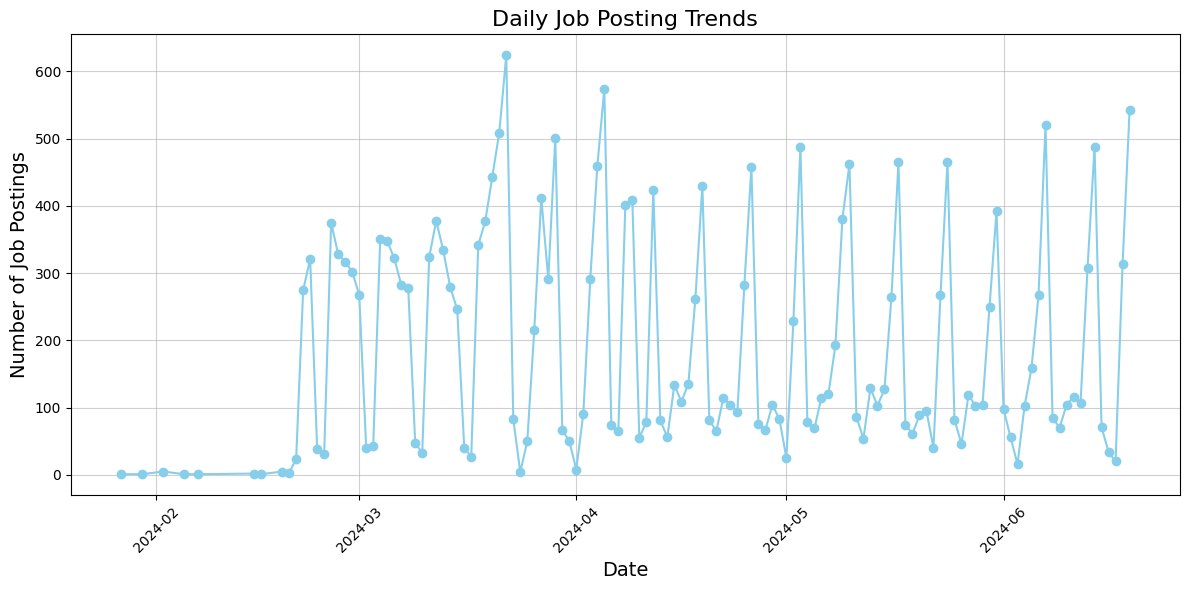

In [125]:
df['Date'] = pd.to_datetime(df['Date'])

df['date'] = df['Date'].dt.date
df['hour'] = df['Date'].dt.hour

daily_trends = df.groupby('date').size()

plt.figure(figsize=(12, 6))
daily_trends.plot(kind='line', marker='o', color='skyblue')
plt.title('Daily Job Posting Trends', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Job Postings', fontsize=14)
plt.grid(True, alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Description:**
X-Axis (Date):

The timeline spans several months (February to June 2024), with markers for specific dates.

Y-Axis (Number of Job Postings):

Indicates the daily count of job postings.

Trend Observations:

- Initial Phase (February 2024): Few or no job postings at the start of the period.
- March 2024: A sudden rise in job postings occurs, peaking at over 600 postings on certain days.

April to June 2024:

- Noticeable fluctuation in job postings with regular spikes and dips.
- The overall number of postings stabilizes at a relatively higher level compared to February.

General Patterns:

- Peaks on certain days suggest batch uploads or significant hiring campaigns.
- Dips may correspond to weekends, holidays, or lower activity days in recruitment.

**Potential Explanations:**

1.March Peak: The spike in March could be due to:

- Seasonal hiring trends (e.g., new fiscal year hiring campaigns).

- Increased recruitment in specific industries or regions during this month.

- Employers posting in bulk after slow activity in February.


2.Fluctuations in Later Months: Reflect daily variations in job postings, possibly influenced by:

- Specific hiring strategies or events (e.g., job fairs).

- Cyclical weekly posting patterns (e.g., lower activity during weekends).

# Average Salary by Category

In [126]:
df[['Category', 'Clean Salary']]

,Category,Clean Salary
13104,Marketing & Communications,10000.0
16946,Sales,4250.0
16947,Construction,10000.0
4687,"Manufacturing, Transport & Logistics",3500.0
4686,Human Resources & Recruitment,4250.0
...,...,...
15501,Insurance & Superannuation,4750.0
12816,Engineering,7900.0
14168,Engineering,2000.0
23872,Administration & Office Support,1750.0


C:\Users\syahm\AppData\Local\Temp\ipykernel_4148\504012890.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_salary.values, y=category_salary.index, palette="magma")


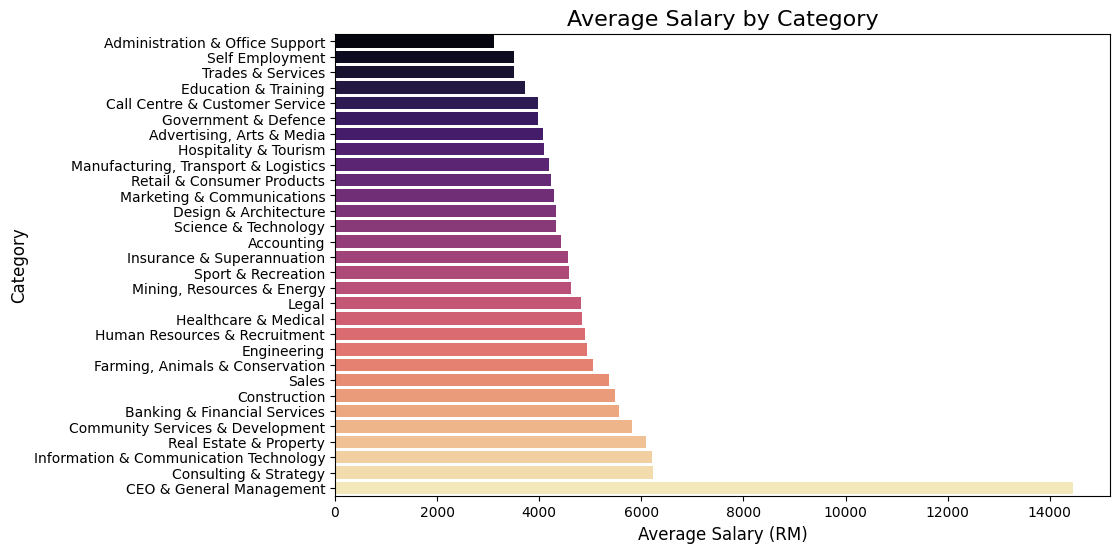

In [127]:
category_salary = df.groupby('Category')['Clean Salary'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_salary.values, y=category_salary.index, palette="magma")
plt.title("Average Salary by Category", fontsize=16)
plt.xlabel("Average Salary (RM)", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.show()


This bar chart illustrates the average salary (in RM) for various job categories. The categories are sorted in ascending order of average salary, with the highest-paying roles at the bottom and the lowest-paying ones at the top.

Key Observations:

**1.Lowest Salary Categories:**

Administration & Office Support, Trades & Services, and Self Employment have the lowest average salaries.
These categories typically average below RM 3,000.

**2.Middle Salary Categories:**

Categories like Accounting, Science & Technology, Legal, and Healthcare & Medical fall in the mid-range, averaging between RM 4,000 to RM 6,000.

**3.Highest Salary Categories:**

The highest-paying roles are in CEO & General Management, Consulting & Strategy, and Information & Communication Technology.
CEO & General Management stands out with an average salary exceeding RM 14,000.

## Why variation in salary ranges across different job categories occurs?

**1.Skill Level and Expertise Required**
Jobs requiring advanced, specialized, or technical skills (e.g., Information Technology, Consulting, Engineering) tend to offer higher salaries.
Roles like Administration & Office Support or Trades & Services require fewer specialized skills or training, resulting in lower compensation.

**2.Educational Requirements**
Professions requiring higher educational qualifications or certifications (e.g., CEO & General Management, Healthcare & Medical, Legal) typically offer higher salaries.
Jobs that don’t require extensive formal education (e.g., Hospitality & Tourism, Retail & Consumer Products) often pay less.

**3.Responsibilities and Decision-Making**
Positions like CEO & General Management involve high levels of responsibility, decision-making, and accountability, which justify higher salaries.
Conversely, roles with limited decision-making capacity (e.g., Call Centre & Customer Service) are compensated less.

# Average Salary by Employment Type

C:\Users\syahm\AppData\Local\Temp\ipykernel_4148\969212025.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=employment_salary.values, y=employment_salary.index, palette="viridis")


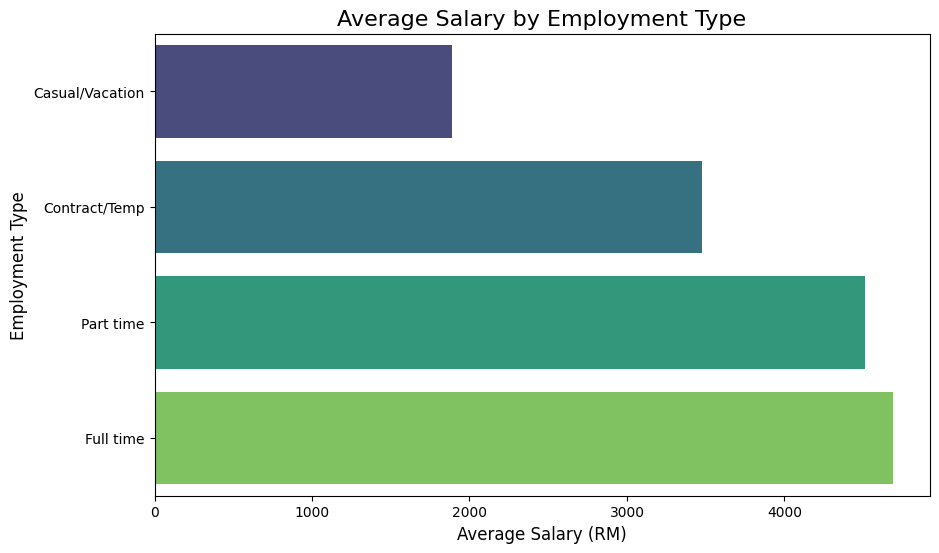

In [128]:
employment_salary = df.groupby('Employment Type')['Clean Salary'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=employment_salary.values, y=employment_salary.index, palette="viridis")

plt.title("Average Salary by Employment Type", fontsize=16)
plt.xlabel("Average Salary (RM)", fontsize=12)
plt.ylabel("Employment Type", fontsize=12)

plt.show()

**1.Full-Time Employment**

Reason for Higher Salaries:

Full-time roles generally involve more hours of work (e.g., 40 hours per week).
These roles often require specialized skills or qualifications, which employers reward with higher pay.
Full-time employees are more likely to receive additional benefits (e.g., insurance, bonuses, paid leave), which may indirectly increase their compensation.
Employers invest more in full-time workers due to their long-term commitment.
Job Stability: Full-time roles offer more stability, encouraging companies to pay competitive wages to retain employees.

**2.Part-Time Employment**

Moderately High Pay:

Part-time roles typically involve fewer work hours but may still require specialized skills (e.g., consultants, freelancers).
Such roles may pay higher hourly rates than casual or temporary jobs, but the total earnings are lower because of fewer hours worked.
Some part-time roles are in industries like education or healthcare, where wages are higher compared to temporary or casual work.

**3.Contract/Temporary Employment**

Moderate Pay Levels:

Contract workers are hired for specific tasks or durations, so their pay is often aligned with market rates.
While contract work may require some level of skill, it typically lacks the long-term job security and benefits of full-time roles, leading to slightly lower compensation.
Employers may avoid offering additional perks to temporary workers, which impacts overall pay.

**4.Casual/Vacation Employment**

Lowest Pay:

Casual work is often associated with unskilled or low-skill labor (e.g., retail, hospitality, seasonal work).
These roles are typically transitory and do not require significant training or education, leading to lower compensation.
Employers may offer minimal wages since the work is irregular or short-term, and benefits are rarely included.
The demand for casual workers fluctuates, further affecting their earnings.

# Employment Type by State

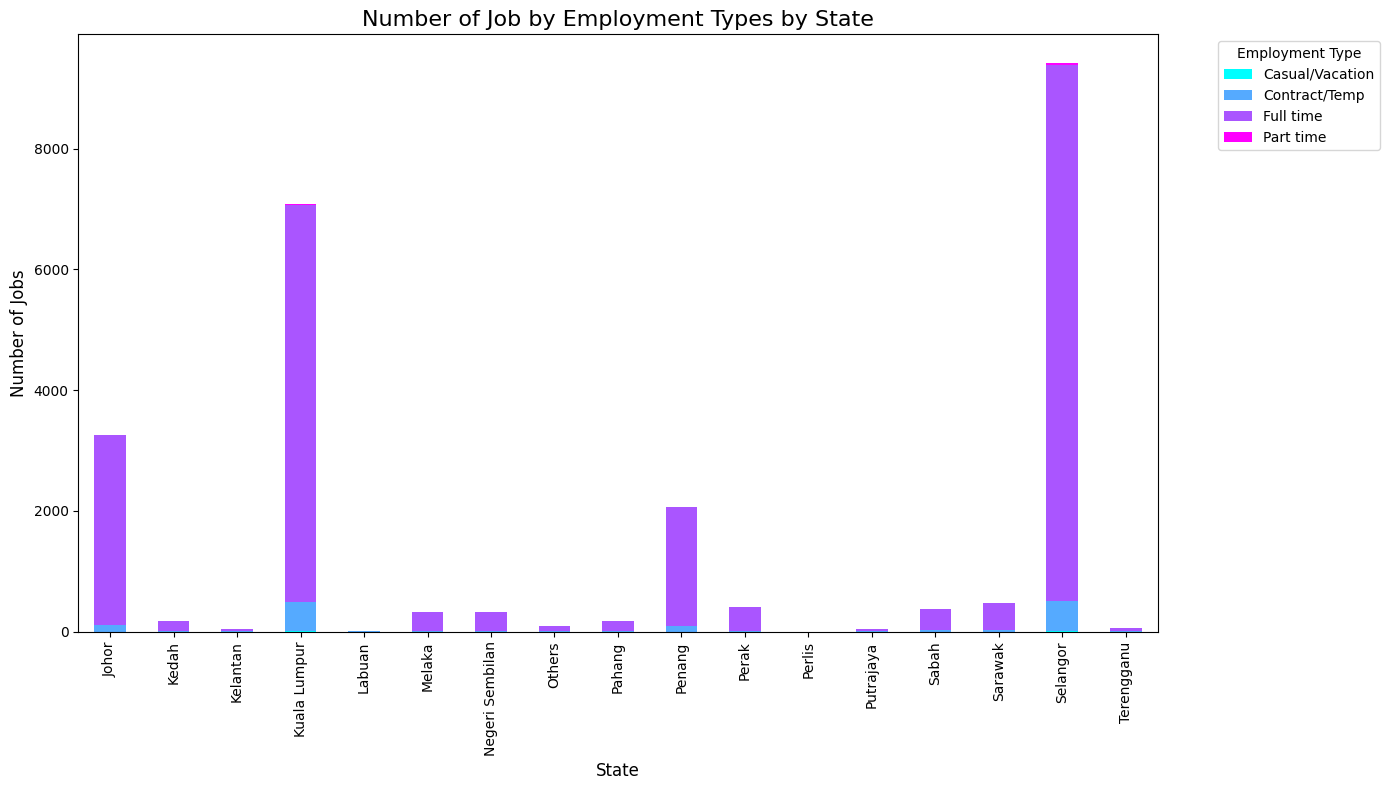

In [129]:
state_employment_count = df.groupby(['State', 'Employment Type']).size().unstack(fill_value=0)

state_employment_count.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='cool')

plt.title("Number of Job by Employment Types by State", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Jobs", fontsize=12)
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

# Average Salary by State

In [130]:
df[['State', 'Clean Salary']]

,State,Clean Salary
13104,Johor,10000.0
16946,Johor,4250.0
16947,Johor,10000.0
4687,Johor,3500.0
4686,Johor,4250.0
...,...,...
15501,Terengganu,4750.0
12816,Terengganu,7900.0
14168,Terengganu,2000.0
23872,Terengganu,1750.0


C:\Users\syahm\AppData\Local\Temp\ipykernel_4148\316766595.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_salary.values, y=state_salary.index, palette="magma")


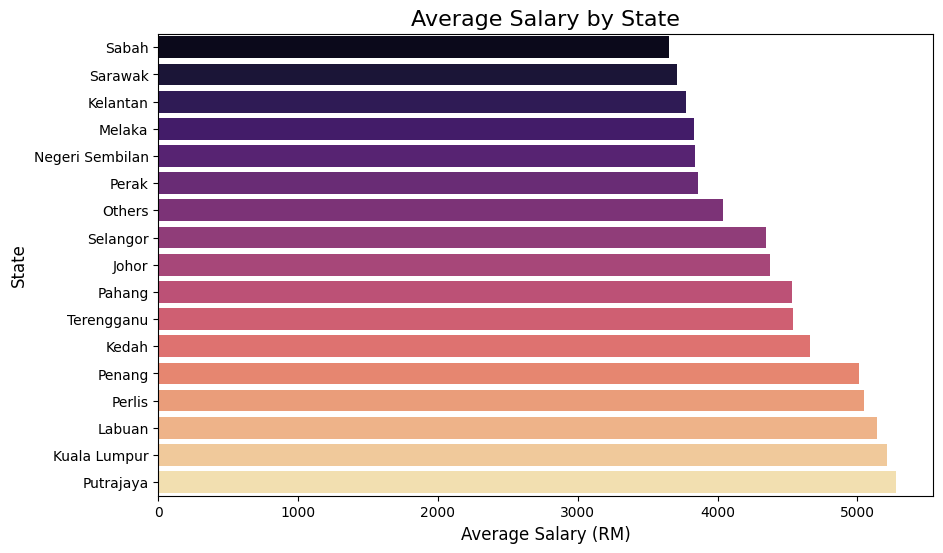

In [131]:
# Group by state and calculate average salary
state_salary = df.groupby('State')['Clean Salary'].mean().sort_values()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=state_salary.values, y=state_salary.index, palette="magma")
plt.title("Average Salary by State", fontsize=16)
plt.xlabel("Average Salary (RM)", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.show()


**Key Observations:**

1.Highest Average Salaries:

- Putrajaya, Labuan, and Kuala Lumpur have the highest average salaries, exceeding RM 4,500.
These regions are federal territories and economic hubs known for high-paying industries such as government administration, finance, and professional services.

2.Moderate Salaries:

- States like Penang, Perlis, Kedah, and Pahang fall in the mid-range (approximately RM 3,000 to RM 4,000).
Penang, for instance, is an industrial center, particularly in electronics and technology, which likely elevates its average salary.

3.Lowest Average Salaries:

- Sabah, Sarawak, Kelantan, and Negeri Sembilan have the lowest average salaries, below RM 3,000.
These states are generally more rural, with economies relying on agriculture, tourism, or resource extraction, which typically involve lower-paying jobs.

**Why the Differences Exist:**

1.Economic Activity:

- Regions with higher average salaries (e.g., Kuala Lumpur, Putrajaya) are major economic centers with a concentration of high-value industries like finance, technology, and government administration.
Conversely, rural states like Sabah and Kelantan rely more on low-income industries such as agriculture and small-scale trade.

2.Cost of Living:

- States with higher salaries often have a higher cost of living (e.g., Kuala Lumpur, Putrajaya). Employers in these regions offer higher wages to attract and retain talent.

3.Industrial Focus:

- States like Penang, known for its manufacturing and technology sectors, have higher average salaries compared to states focused on agriculture or tourism.

4.Urban vs. Rural Divide:

- Urbanized areas like Kuala Lumpur and Selangor attract high-paying jobs due to the presence of MNCs, government offices, and an educated workforce.
- Rural states like Sarawak and Kelantan, with limited industrialization, tend to have lower wages.

5.Employment Distribution:

- States with more full-time and professional jobs (e.g., Kuala Lumpur, Penang) tend to report higher average salaries, while states with more casual or temporary jobs (e.g., Sabah, Kelantan) see lower averages.

# Number of Jobs by Category and State

In [132]:
df[['State', 'Category']]

,State,Category
13104,Johor,Marketing & Communications
16946,Johor,Sales
16947,Johor,Construction
4687,Johor,"Manufacturing, Transport & Logistics"
4686,Johor,Human Resources & Recruitment
...,...,...
15501,Terengganu,Insurance & Superannuation
12816,Terengganu,Engineering
14168,Terengganu,Engineering
23872,Terengganu,Administration & Office Support


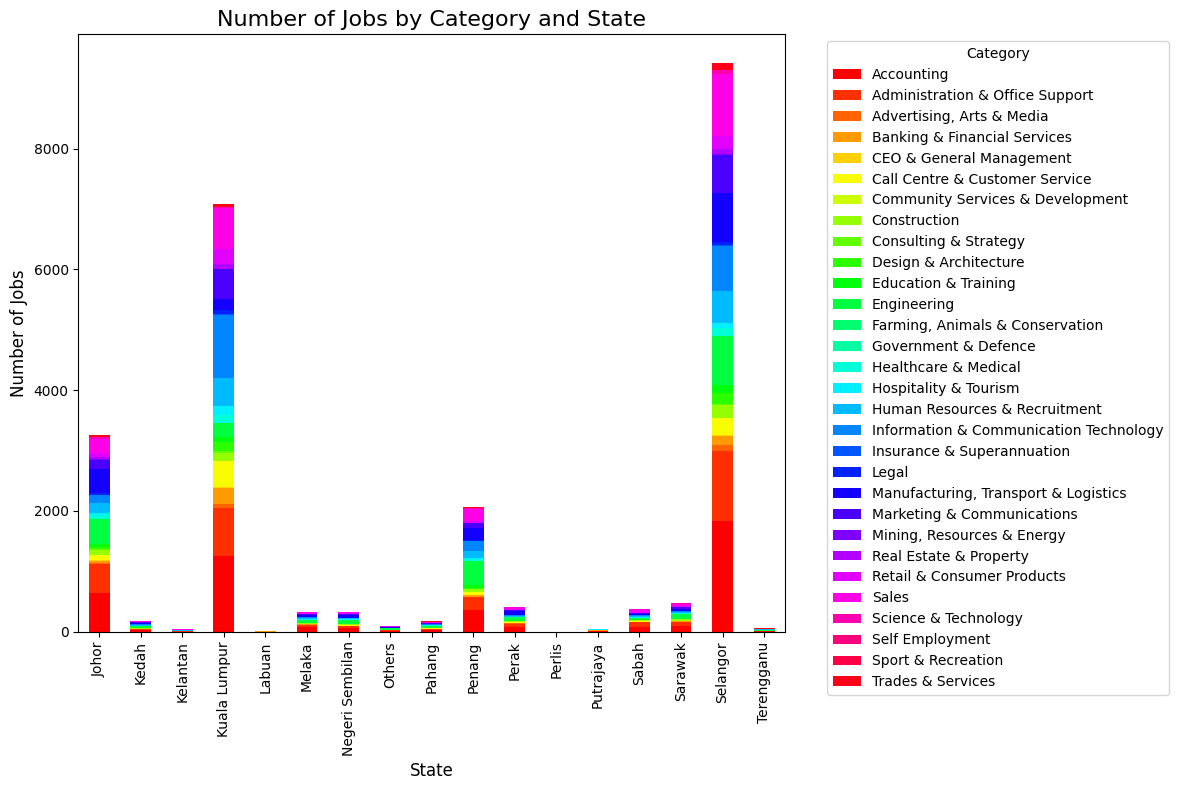

In [133]:
# Count jobs in each category by state
category_location = df.groupby(['State', 'Category']).size().unstack(fill_value=0)

# Plot
category_location.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='hsv')
plt.title("Number of Jobs by Category and State", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Jobs", fontsize=12)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Key Observations:**

1.States with the Most Jobs:

- Kuala Lumpur and Selangor have the highest number of jobs across all categories, with Selangor slightly higher.
These two states dominate the chart, indicating that they are the primary job hubs.

2.States with Fewer Jobs:

- States such as Perlis, Labuan, and Putrajaya show significantly fewer jobs across all categories.

3.Job Categories:

- The chart uses a wide range of colors to represent job categories, as indicated in the legend.
Categories like Accounting (blue), Healthcare & Medical (light pink), and Engineering (brown) appear prominently in high-job states like Kuala Lumpur and Selangor.

4.Regional Trends:

- Sarawak and Penang have a notable number of jobs, but they are significantly lower compared to Selangor and Kuala Lumpur.
Other states such as Johor, Sabah, and Pahang have moderate job numbers but are much less diverse in job categories.

5.Diversity of Job Categories:

- States with more jobs (e.g., Kuala Lumpur and Selangor) also show greater diversity in job categories.
- States with fewer jobs tend to have fewer job categories represented.

**Conclusion:**
The chart highlights that the job market in Malaysia is concentrated in urban and economically significant states like Kuala Lumpur and Selangor. These states not only offer more jobs but also a greater variety of opportunities across different sectors. Other states, especially smaller or rural ones, have fewer jobs and less diversity in job categories.

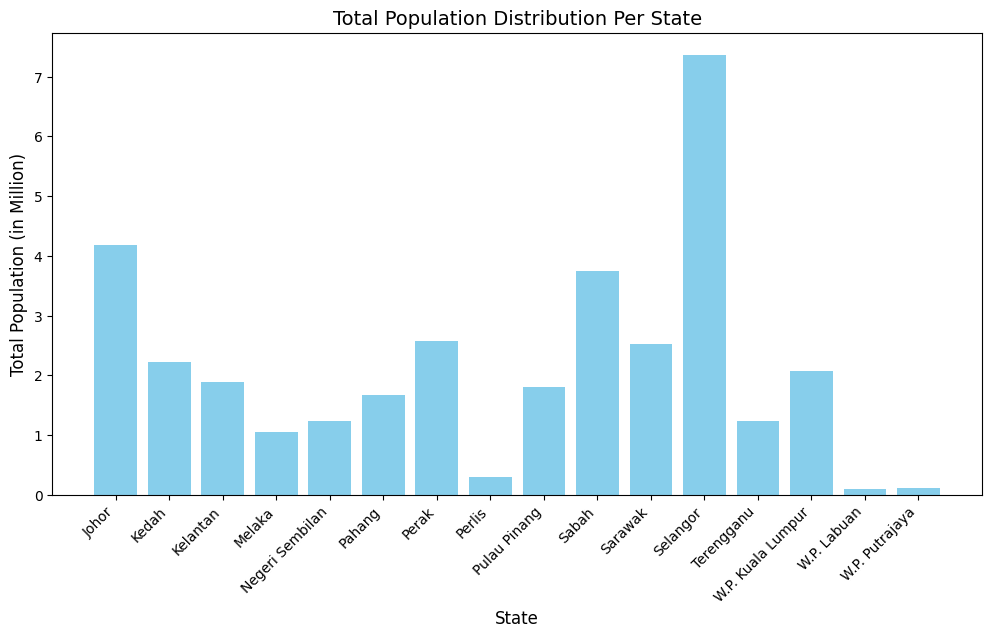

In [134]:
plt.figure(figsize=(12, 6))
plt.bar(
    total_population_per_state['state'], 
    total_population_per_state['population'], 
    color='skyblue'
)

# Add labels and title
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Population (in Million)', fontsize=12)
plt.title('Total Population Distribution Per State', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the bar chart
plt.show()

**Observations:**

Job Postings (First Chart):

- The states with the highest number of job postings are Selangor and Kuala Lumpur, followed by Sarawak.
- These areas also show a variety of job categories, but major contributions are in fields like Information and Communication Technology, Sales, and Retail.
Population Distribution (Second Chart):

Selangor has the highest population (7 million), followed by Johor, Sabah, and Sarawak. Kuala Lumpur, while having a lower population than these states, is a concentrated urban hub.

**Correlation Insights:**
- Selangor: The high population aligns with a high number of job postings, likely due to its role as an industrial and economic hub.
- Kuala Lumpur: Although its population is not the largest, its status as the capital and a business center contributes to a disproportionally high number of job postings.
- Sarawak: Despite a lower population than Selangor, Sarawak shows relatively high job postings, possibly due to its specific industries (e.g., energy, agriculture).
- Johor and Sabah: These states have high populations but do not rank as high in job postings, potentially due to less industrial or corporate density compared to Selangor and Kuala Lumpur.

**Conclusion:**
While population size appears to have a moderate impact on job postings, the economic focus and industrial hubs of the regions (e.g., Selangor and Kuala Lumpur) play a more significant role in job availability. States with high populations but fewer economic activities (e.g., Johor) may not have as many job postings.

**Observations:**

Job Postings (First Chart):

- The states with the highest number of job postings are Selangor and Kuala Lumpur, followed by Sarawak.
- These areas also show a variety of job categories, but major contributions are in fields like Information and Communication Technology, Sales, and Retail.
Population Distribution (Second Chart):

Selangor has the highest population (7 million), followed by Johor, Sabah, and Sarawak. Kuala Lumpur, while having a lower population than these states, is a concentrated urban hub.

**Correlation Insights:**
- Selangor: The high population aligns with a high number of job postings, likely due to its role as an industrial and economic hub.
- Kuala Lumpur: Although its population is not the largest, its status as the capital and a business center contributes to a disproportionally high number of job postings.
- Sarawak: Despite a lower population than Selangor, Sarawak shows relatively high job postings, possibly due to its specific industries (e.g., energy, agriculture).
- Johor and Sabah: These states have high populations but do not rank as high in job postings, potentially due to less industrial or corporate density compared to Selangor and Kuala Lumpur.

**Conclusion:**
While population size appears to have a moderate impact on job postings, the economic focus and industrial hubs of the regions (e.g., Selangor and Kuala Lumpur) play a more significant role in job availability. States with high populations but fewer economic activities (e.g., Johor) may not have as many job postings.